# Pendahuluan 
Menjadi junior data analyst di Home World yang merupakan perusahaan retail bahan bangunan, dimana setiap customer memiliki kartu member. Customer bisa menjadi member yang mempunyai loyalty program dengan membayar 20 $ per bulannya. program yang termasuk discount, informasi untuk penawaran khusus, dan hadiah.

- Bisnis frenchise memiliki kecenderungan untuk mempertahankan customer yang loyal, hal ini untuk terus mengembangkan Home World sebagai bisnis yang bisa terus berkembang berdasarkan loyalitas dari customer.

- Dengan adanya loyalti program member, adalah bagian dari upaya dari bisnis Home World untuk memberikan kenyamanan bagi customer, dimana customer akan di berikan berbagai keuntungan dari adanya program loyalty member

Oleh karena Analysis ini bertujuan untuk melihat apakah program loyalty member dapat memberikan pengaruh yang bagus pada penjualan dan kecenderungan customer kembali membeli di berbagai cabang Home World. 

# Tujuan 

- Mencari tahu mengenai program loyalitas dan pengaruhnya di berbagai cabang 
- Mencari tahu probabilitas customer memperpanjang program loyalitas 
- Mencari tahu product yang paling sering di beli dengan program loyalitas atau non mamber

# Tahapan

1. Ihktisar Data
2. Analysis Data Eksplorasi
3. Hypothesis
4. Kesimpulan 

## Ikhtisar data 

In [123]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import scipy.stats as stats
from plotly import graph_objects as go
import math as mth
import math as factorial
import warnings
warnings.filterwarnings('ignore')


In [124]:
data1 = pd.read_csv('/datasets/retail_dataset_us.csv')
data1.head()

,purchaseid,item_ID,Quantity,purchasedate,CustomerID,loyalty_program,ShopID
0,538280,21873,11,2016-12-10 12:50:00,18427.0,0,Shop 3
1,538862,22195,0,2016-12-14 14:11:00,22389.0,1,Shop 2
2,538855,21239,7,2016-12-14 13:50:00,22182.0,1,Shop 3
3,543543,22271,0,2017-02-09 15:33:00,23522.0,1,Shop 28
4,543812,79321,0,2017-02-13 14:40:00,23151.0,1,Shop 28


In [125]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105335 entries, 0 to 105334
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   purchaseid       105335 non-null  object 
 1   item_ID          105335 non-null  object 
 2   Quantity         105335 non-null  int64  
 3   purchasedate     105335 non-null  object 
 4   CustomerID       69125 non-null   float64
 5   loyalty_program  105335 non-null  int64  
 6   ShopID           105335 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 5.6+ MB


In [126]:
data1.sample(frac=0.5)

,purchaseid,item_ID,Quantity,purchasedate,CustomerID,loyalty_program,ShopID
59373,544071,21472,5,2017-02-15 14:30:00,21996.0,0,Shop 20
4184,543116,21621,11,2017-02-03 13:29:00,23351.0,1,Shop 19
90707,545215,21430,0,2017-02-28 16:47:00,NaN,0,Shop 0
8181,538890,21976,4,2016-12-14 16:39:00,18546.0,0,Shop 9
69743,543467,22699,1,2017-02-08 14:35:00,NaN,0,Shop 0
...,...,...,...,...,...,...,...
60559,538810,21363,0,2016-12-14 12:18:00,20550.0,0,Shop 2
68806,539436,16238,2,2016-12-17 14:49:00,NaN,0,Shop 0
51470,539039,21485,3,2016-12-15 15:00:00,18803.0,0,Shop 15
85367,539437,84029E,0,2016-12-17 14:54:00,NaN,0,Shop 0


In [127]:
data2 = pd.read_csv('/datasets/product_codes_us.csv', sep= ';')

In [128]:
data2

,productID,price_per_one
0,10002,0.85
1,10080,0.85
2,10120,0.21
3,10123C,0.65
4,10124A,0.42
...,...,...
3154,gift_0001_20,16.67
3155,gift_0001_30,25.00
3156,gift_0001_40,34.04
3157,gift_0001_50,42.55


In [129]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3159 entries, 0 to 3158
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   productID      3159 non-null   object 
 1   price_per_one  3159 non-null   float64
dtypes: float64(1), object(1)
memory usage: 49.5+ KB


#### Kesimpulan awal 1
- Pada dataset data1 terlihat ada nilah nan yang mencurigakan, hal ini biasanya berpengaruh pada member atau customer yang masuk program loyalty.
- di butuhkan pengecekan lebih lanjut terhadap nilai nan 
- Terdapat 3159 product terdata

## Pra Proses Data

### Melakukan penyesuaian terhadap dataset

In [130]:
data1.rename(columns = {'purchaseid' : 'purchase_id',
                        'item_ID' : 'product_id',
                        'Quantity' : 'quantity',
                        'purchasedate' : 'purchase_date',
                       'CustomerID':'customer_id',
                      'ShopID' : 'shop_id'}, inplace=True)
data1.columns

Index(['purchase_id', 'product_id', 'quantity', 'purchase_date', 'customer_id',
       'loyalty_program', 'shop_id'],
      dtype='object')

In [131]:
data1.loc[data1['customer_id'].isna()]

,purchase_id,product_id,quantity,purchase_date,customer_id,loyalty_program,shop_id
6,540468,22189,0,2017-01-07 13:55:00,NaN,0,Shop 0
7,541424,79321,1,2017-01-17 17:57:00,NaN,0,Shop 0
8,538883,22891,0,2016-12-14 15:56:00,NaN,0,Shop 0
11,541696,22197,4,2017-01-20 18:08:00,NaN,0,Shop 0
16,539744,22300,5,2016-12-21 15:21:00,NaN,0,Shop 0
...,...,...,...,...,...,...,...
105325,536982,20719,69,2016-12-03 14:27:00,NaN,0,Shop 0
105326,540681,22227,1,2017-01-10 16:25:00,NaN,0,Shop 0
105327,538349,22625,0,2016-12-10 14:59:00,NaN,0,Shop 0
105329,540154,22134,3,2017-01-05 11:30:00,NaN,0,Shop 0


In [132]:
# Pengecekan persamaan shop0 Dengan nan
data1.loc[~(data1['customer_id'].isna()) & (data1['shop_id'] == 'Shop 0')]

,purchase_id,product_id,quantity,purchase_date,customer_id,loyalty_program,shop_id
48,540506,21539,1,2017-01-09 11:12:00,23475.0,1,Shop 0
66,539314,84836,11,2016-12-16 18:20:00,19553.0,0,Shop 0
68,545065,22505,3,2017-02-27 14:43:00,18110.0,0,Shop 0
69,544115,21063,23,2017-02-16 11:45:00,18406.0,0,Shop 0
91,541139,22664,4,2017-01-14 11:05:00,20892.0,0,Shop 0
...,...,...,...,...,...,...,...
105087,542347,22383,9,2017-01-27 12:06:00,18505.0,0,Shop 0
105189,543555,84970L,11,2017-02-10 10:18:00,23365.0,1,Shop 0
105229,543277,21533,0,2017-02-06 14:33:00,21487.0,0,Shop 0
105250,C540847,22197,-3,2017-01-11 17:35:00,19137.0,0,Shop 0


In [133]:
olshop = data1.groupby('shop_id')['customer_id']

In [134]:
olshop.count()

shop_id
Shop 0     2380
Shop 1     2744
Shop 10    2204
Shop 11    2301
Shop 12    1786
Shop 13    2448
Shop 14    2400
Shop 15    2710
Shop 16    1939
Shop 17    2178
Shop 18    2022
Shop 19    2242
Shop 2     2248
Shop 20    2435
Shop 21    1654
Shop 22    2601
Shop 23    2075
Shop 24    2656
Shop 25    1878
Shop 26    2340
Shop 27    2338
Shop 28    2324
Shop 29    2202
Shop 3     1732
Shop 30    2395
Shop 4     1968
Shop 5     2510
Shop 6     1566
Shop 7     2368
Shop 8     1985
Shop 9     2496
Name: customer_id, dtype: int64

In [135]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105335 entries, 0 to 105334
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   purchase_id      105335 non-null  object 
 1   product_id       105335 non-null  object 
 2   quantity         105335 non-null  int64  
 3   purchase_date    105335 non-null  object 
 4   customer_id      69125 non-null   float64
 5   loyalty_program  105335 non-null  int64  
 6   shop_id          105335 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 5.6+ MB


In [136]:
data1.isnull().sum()

purchase_id            0
product_id             0
quantity               0
purchase_date          0
customer_id        36210
loyalty_program        0
shop_id                0
dtype: int64

#### Kesimpulan awal 1
- Pada Customer id terdapat 36210 nilai yang hilang
- Kemungkinan Pembelian di lakukan secara online 
- Atau mungkin kesalahan pencatatan 

In [137]:
data1.groupby('shop_id')['customer_id'].size()

shop_id
Shop 0     38389
Shop 1      2744
Shop 10     2204
Shop 11     2301
Shop 12     1786
Shop 13     2448
Shop 14     2400
Shop 15     2710
Shop 16     1939
Shop 17     2178
Shop 18     2022
Shop 19     2242
Shop 2      2248
Shop 20     2435
Shop 21     1668
Shop 22     2601
Shop 23     2077
Shop 24     2656
Shop 25     1935
Shop 26     2340
Shop 27     2338
Shop 28     2324
Shop 29     2202
Shop 3      1732
Shop 30     2395
Shop 4      1968
Shop 5      2510
Shop 6      1694
Shop 7      2368
Shop 8      1985
Shop 9      2496
Name: customer_id, dtype: int64

In [138]:
data1['customer_id'] = data1['customer_id'].fillna('0')

In [139]:
data1.isnull().sum()

purchase_id        0
product_id         0
quantity           0
purchase_date      0
customer_id        0
loyalty_program    0
shop_id            0
dtype: int64

#### Kesimpulan awal
- Terhadap temuan dimana shop 0 memiliki outlier data, dimana bisa di cirigai adalah pembelian secara online

## Ekplorasi Data Analysis

### Membuat variable untuk mengetahui member dari loyalty program 

In [140]:
member = data1[data1['loyalty_program'] == 1]
member

,purchase_id,product_id,quantity,purchase_date,customer_id,loyalty_program,shop_id
1,538862,22195,0,2016-12-14 14:11:00,22389.0,1,Shop 2
2,538855,21239,7,2016-12-14 13:50:00,22182.0,1,Shop 3
3,543543,22271,0,2017-02-09 15:33:00,23522.0,1,Shop 28
4,543812,79321,0,2017-02-13 14:40:00,23151.0,1,Shop 28
5,538379,22965,0,2016-12-12 11:26:00,22805.0,1,Shop 20
...,...,...,...,...,...,...,...
105310,543815,21123,1,2017-02-13 15:18:00,22934.0,1,Shop 29
105313,536790,82494L,5,2016-12-02 15:26:00,23529.0,1,Shop 30
105314,538073,22439,0,2016-12-09 14:10:00,23495.0,1,Shop 22
105315,543306,22898,0,2017-02-07 11:56:00,22365.0,1,Shop 18


In [141]:
non_member = data1[data1['loyalty_program'] == 0]
non_member

,purchase_id,product_id,quantity,purchase_date,customer_id,loyalty_program,shop_id
0,538280,21873,11,2016-12-10 12:50:00,18427.0,0,Shop 3
6,540468,22189,0,2017-01-07 13:55:00,0,0,Shop 0
7,541424,79321,1,2017-01-17 17:57:00,0,0,Shop 0
8,538883,22891,0,2016-12-14 15:56:00,0,0,Shop 0
11,541696,22197,4,2017-01-20 18:08:00,0,0,Shop 0
...,...,...,...,...,...,...,...
105329,540154,22134,3,2017-01-05 11:30:00,0,0,Shop 0
105330,538566,21826,1,2016-12-13 11:21:00,0,0,Shop 0
105331,540247,21742,0,2017-01-05 15:56:00,21143.0,0,Shop 24
105333,538207,22818,11,2016-12-10 11:33:00,18427.0,0,Shop 29


### Bagaimana distribusi program loyalitas di berbagai cabang 

In [142]:
data1.head()

,purchase_id,product_id,quantity,purchase_date,customer_id,loyalty_program,shop_id
0,538280,21873,11,2016-12-10 12:50:00,18427.0,0,Shop 3
1,538862,22195,0,2016-12-14 14:11:00,22389.0,1,Shop 2
2,538855,21239,7,2016-12-14 13:50:00,22182.0,1,Shop 3
3,543543,22271,0,2017-02-09 15:33:00,23522.0,1,Shop 28
4,543812,79321,0,2017-02-13 14:40:00,23151.0,1,Shop 28


In [143]:
branch_loyalty_cust = pd.pivot_table(data1, index=['customer_id', 'loyalty_program'], values='shop_id', aggfunc='count').reset_index()

In [144]:
branch_loyalty_cust.head()

,customer_id,loyalty_program,shop_id
0,18025.0,0,2
1,18026.0,0,60
2,18027.0,0,23
3,18029.0,0,17
4,18031.0,0,15


In [145]:
branch_loyalty_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1750 entries, 0 to 1749
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   customer_id      1750 non-null   object
 1   loyalty_program  1750 non-null   int64 
 2   shop_id          1750 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 41.1+ KB


In [146]:
branch_loyalty_cust.count()

customer_id        1750
loyalty_program    1750
shop_id            1750
dtype: int64

In [147]:
branch_loyalty_cust.groupby('loyalty_program').count()['shop_id'].reset_index()

,loyalty_program,shop_id
0,0,1163
1,1,587


#### Kesimpulan awal 1
- Dari 1750 cabang 587 cabang mempunyai customer termasuk kedalam program loyalty 

### Program loyalitas dan non loyalitas ada di cabang mana saja 

In [148]:
member_brench = member.groupby('shop_id').nunique()['customer_id']
member_brench

shop_id
Shop 0     40
Shop 1     39
Shop 10    42
Shop 11    43
Shop 12    39
Shop 13    50
Shop 14    39
Shop 15    37
Shop 16    41
Shop 17    48
Shop 18    37
Shop 19    36
Shop 2     40
Shop 20    49
Shop 21    39
Shop 22    46
Shop 23    40
Shop 24    40
Shop 25    39
Shop 26    49
Shop 27    40
Shop 28    33
Shop 29    43
Shop 3     44
Shop 30    36
Shop 4     38
Shop 5     39
Shop 6     34
Shop 7     49
Shop 8     42
Shop 9     37
Name: customer_id, dtype: int64

In [149]:
non_member_brench = non_member.groupby('shop_id').nunique()['customer_id']
non_member_brench

shop_id
Shop 0      98
Shop 1      94
Shop 10     73
Shop 11     89
Shop 12     79
Shop 13     78
Shop 14     88
Shop 15     93
Shop 16     70
Shop 17     86
Shop 18     81
Shop 19    102
Shop 2      83
Shop 20     80
Shop 21     78
Shop 22     87
Shop 23     70
Shop 24     91
Shop 25     61
Shop 26     86
Shop 27     85
Shop 28     95
Shop 29     82
Shop 3      57
Shop 30     86
Shop 4      86
Shop 5      99
Shop 6      73
Shop 7      90
Shop 8      80
Shop 9      94
Name: customer_id, dtype: int64

#### Kesimpulan awal 2 
- Non member lebih banyak melakukan pembelian di berbagai cabang Home World

### Pembelian produk dengan program loyalitas di berbagai cabang

In [150]:
member.groupby('product_id').count()['shop_id']

product_id
10002     11
10120      3
10123C     1
10124A     2
10124G     1
          ..
90212B     1
90212C     1
D          4
M         30
POST       1
Name: shop_id, Length: 2411, dtype: int64

In [151]:
product_branch_loyal = member.pivot_table(index='product_id', columns='shop_id', values='loyalty_program', aggfunc='count')

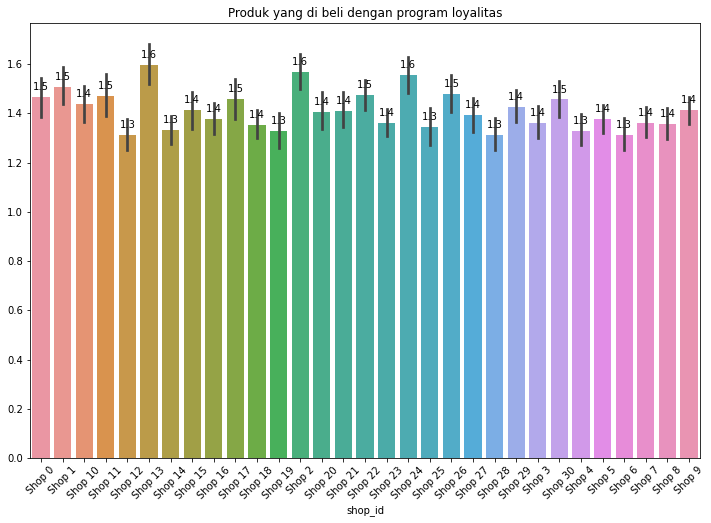

In [152]:
plt.figure(figsize=(12,8))
splot = sns.barplot(data=product_branch_loyal)
for g in splot.patches:
    splot.annotate(format(g.get_height(), '.1f'),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 10),
                   textcoords = 'offset points')
plt.xticks(rotation = 45)
plt.title('Produk yang di beli dengan program loyalitas')
plt.show();

#### Kesimpulan awal 3
- Shop 13, Shop 2, Shop 24 merupakan cabang dimana pembelian product dengan member loyalitas paling banyak

# Probabilitas cabang yang mempunyai pembelian dengan program loyalitas terbanyak ?

### Distribusi pembelian member loyalitas di berbagai cabang dan mencari tau probabilitas pembelian dari program loyalitas terbanyak

In [153]:
np.var(product_branch_loyal)

shop_id
Shop 0     1.031570
Shop 1     0.957433
Shop 10    0.653720
Shop 11    1.022516
Shop 12    0.506671
Shop 13    1.150056
Shop 14    0.458383
Shop 15    0.813230
Shop 16    0.575548
Shop 17    0.871280
Shop 18    0.517431
Shop 19    0.579834
Shop 2     0.897495
Shop 20    0.698801
Shop 21    0.729475
Shop 22    0.667345
Shop 23    0.454370
Shop 24    0.869288
Shop 25    0.829836
Shop 26    0.946729
Shop 27    0.639275
Shop 28    0.509891
Shop 29    0.626877
Shop 3     0.550802
Shop 30    0.642293
Shop 4     0.386567
Shop 5     0.493210
Shop 6     0.462644
Shop 7     0.536054
Shop 8     0.566229
Shop 9     0.544736
dtype: float64

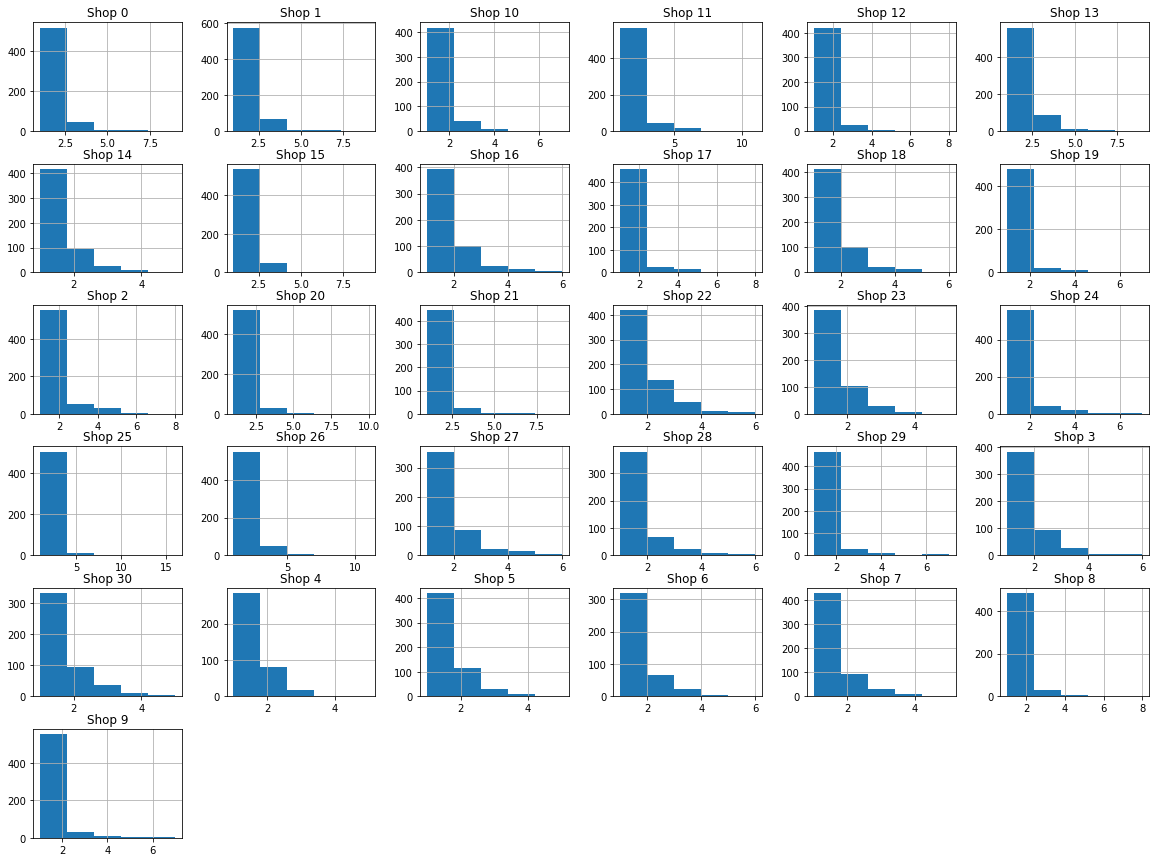

In [154]:
product_branch_loyal.hist(figsize= (20,15), bins= 5)
plt.show()

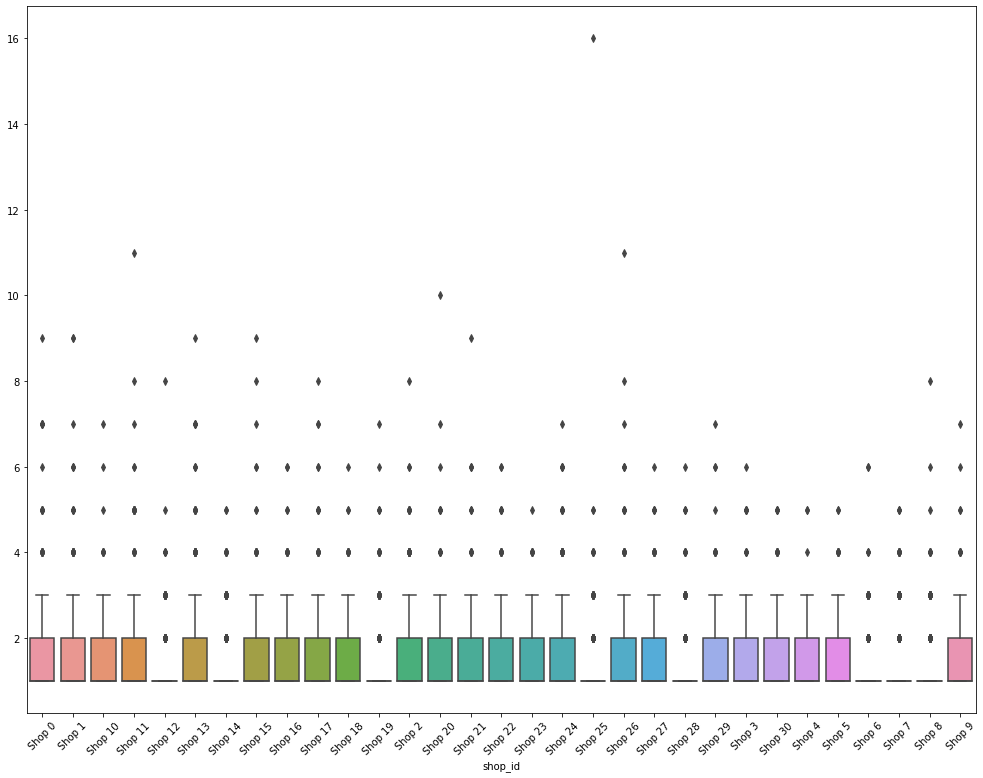

In [155]:
plt.figure(figsize= (17,13))
sns.boxplot(data=product_branch_loyal)
plt.xticks(rotation=45)
plt.show()


In [156]:
member.head()

,purchase_id,product_id,quantity,purchase_date,customer_id,loyalty_program,shop_id
1,538862,22195,0,2016-12-14 14:11:00,22389.0,1,Shop 2
2,538855,21239,7,2016-12-14 13:50:00,22182.0,1,Shop 3
3,543543,22271,0,2017-02-09 15:33:00,23522.0,1,Shop 28
4,543812,79321,0,2017-02-13 14:40:00,23151.0,1,Shop 28
5,538379,22965,0,2016-12-12 11:26:00,22805.0,1,Shop 20


In [157]:
purch_product_branch_loyal = member.groupby('shop_id').agg({'purchase_date' : 'nunique'}).reset_index()
purch_product_branch_loyal

,shop_id,purchase_date
0,Shop 0,42
1,Shop 1,40
2,Shop 10,44
3,Shop 11,48
4,Shop 12,42
5,Shop 13,53
6,Shop 14,42
7,Shop 15,38
8,Shop 16,45
9,Shop 17,51


In [158]:
avg_product_branch_loyal = purch_product_branch_loyal.mean()
print('Pembelian rata rata member di setiap cabang:', int(avg_product_branch_loyal),'Pembelian')

Pembelian rata rata member di setiap cabang: 43 Pembelian


In [159]:
purch_product_branch_non = non_member.groupby('shop_id').agg({'purchase_date' : 'nunique'}).reset_index()
purch_product_branch_non

,shop_id,purchase_date
0,Shop 0,714
1,Shop 1,102
2,Shop 10,89
3,Shop 11,99
4,Shop 12,83
5,Shop 13,81
6,Shop 14,92
7,Shop 15,102
8,Shop 16,77
9,Shop 17,93


In [160]:
avg_product_branch_non = purch_product_branch_non.mean()
print('Pembelian rata rata non member di setiap cabang:', int(avg_product_branch_non),'Pembelian')

Pembelian rata rata non member di setiap cabang: 110 Pembelian


In [161]:
x = [43, 110] 
standard_deviation = np.std(x)
standard_deviation

33.5

#### Kesimpulan awal
- Dapat di ketahui rata rata pembelian dari setiap cabang adalah 110 pembelian
- 33.5 % merupakan standar deviasi yang di dapatkan dari penyebaran pembelian di setiap cabang

# Kapan produk di beli di berbagai cabang ?

### Mencari tahu Product yang di beli di berbagai cabang

In [162]:
data1['purchase_date'] = pd.to_datetime(data1['purchase_date'])

In [163]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105335 entries, 0 to 105334
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   purchase_id      105335 non-null  object        
 1   product_id       105335 non-null  object        
 2   quantity         105335 non-null  int64         
 3   purchase_date    105335 non-null  datetime64[ns]
 4   customer_id      105335 non-null  object        
 5   loyalty_program  105335 non-null  int64         
 6   shop_id          105335 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 5.6+ MB


In [164]:
data1['date']= data1['purchase_date'].astype('datetime64[D]')

In [165]:
data1

,purchase_id,product_id,quantity,purchase_date,customer_id,loyalty_program,shop_id,date
0,538280,21873,11,2016-12-10 12:50:00,18427.0,0,Shop 3,2016-12-10
1,538862,22195,0,2016-12-14 14:11:00,22389.0,1,Shop 2,2016-12-14
2,538855,21239,7,2016-12-14 13:50:00,22182.0,1,Shop 3,2016-12-14
3,543543,22271,0,2017-02-09 15:33:00,23522.0,1,Shop 28,2017-02-09
4,543812,79321,0,2017-02-13 14:40:00,23151.0,1,Shop 28,2017-02-13
...,...,...,...,...,...,...,...,...
105330,538566,21826,1,2016-12-13 11:21:00,0,0,Shop 0,2016-12-13
105331,540247,21742,0,2017-01-05 15:56:00,21143.0,0,Shop 24,2017-01-05
105332,538068,85048,1,2016-12-09 14:05:00,23657.0,1,Shop 16,2016-12-09
105333,538207,22818,11,2016-12-10 11:33:00,18427.0,0,Shop 29,2016-12-10


In [166]:
product_buy_tstamp = pd.pivot_table(data1, index=['date','product_id', 'shop_id'], values='customer_id', aggfunc='count').reset_index()

In [167]:
product_buy_tstamp.sort_values(by=['shop_id','customer_id'], ascending = False)

,date,product_id,shop_id,customer_id
82541,2017-02-20,22256,Shop 9,5
7981,2016-12-05,22727,Shop 9,4
15585,2016-12-08,22867,Shop 9,4
27461,2016-12-15,85038,Shop 9,4
7010,2016-12-05,21811,Shop 9,3
...,...,...,...,...
91618,2017-02-28,90201D,Shop 0,1
91619,2017-02-28,90202A,Shop 0,1
91620,2017-02-28,90208,Shop 0,1
91621,2017-02-28,90209B,Shop 0,1


In [168]:
product_buy_tstamp.sort_values(by=['shop_id','customer_id'], ascending = True)

,date,product_id,shop_id,customer_id
0,2016-12-01,10002,Shop 0,1
4,2016-12-01,10135,Shop 0,1
5,2016-12-01,11001,Shop 0,1
16,2016-12-01,16168M,Shop 0,1
24,2016-12-01,17003,Shop 0,1
...,...,...,...,...
82796,2017-02-20,22804,Shop 9,3
7981,2016-12-05,22727,Shop 9,4
15585,2016-12-08,22867,Shop 9,4
27461,2016-12-15,85038,Shop 9,4


#### Kesimpulan awal 
- Baru di ketahui tanggal mulai dataset 2016-12-01 sampai 2017-02-20
- Untuk visualisasi akan sangat membantu

In [169]:
product_buy_tstamp['date'] = product_buy_tstamp['date'].astype(int)

In [170]:
product_buy_tstamp['date']

0        1480550400000000000
1        1480550400000000000
2        1480550400000000000
3        1480550400000000000
4        1480550400000000000
                ...         
91627    1488240000000000000
91628    1488240000000000000
91629    1488240000000000000
91630    1488240000000000000
91631    1488240000000000000
Name: date, Length: 91632, dtype: int64

# Menggunakan patern di setiap shop dan setiap tanggal menggunakan pivot tabel

#### Kesimpulan awal
- Akan sangat bagus untuk membuat visualisasi waktu pembelian dengan menggunakan hexbin plot akan tetapi saya belum bisa membuatnya.
- Sangat mantap jika saya dapat bantuan jika ingin menggunakan hexbin.
- Terima kasih


# Probabilitas customer memperpanjang program loyalitas dalam jangka waktu 1 tahun ?

### Analysis probabilitas customer memperpanjang program loyalitas dalam jangka waktu 1 tahun

In [171]:
data1

,purchase_id,product_id,quantity,purchase_date,customer_id,loyalty_program,shop_id,date
0,538280,21873,11,2016-12-10 12:50:00,18427.0,0,Shop 3,2016-12-10
1,538862,22195,0,2016-12-14 14:11:00,22389.0,1,Shop 2,2016-12-14
2,538855,21239,7,2016-12-14 13:50:00,22182.0,1,Shop 3,2016-12-14
3,543543,22271,0,2017-02-09 15:33:00,23522.0,1,Shop 28,2017-02-09
4,543812,79321,0,2017-02-13 14:40:00,23151.0,1,Shop 28,2017-02-13
...,...,...,...,...,...,...,...,...
105330,538566,21826,1,2016-12-13 11:21:00,0,0,Shop 0,2016-12-13
105331,540247,21742,0,2017-01-05 15:56:00,21143.0,0,Shop 24,2017-01-05
105332,538068,85048,1,2016-12-09 14:05:00,23657.0,1,Shop 16,2016-12-09
105333,538207,22818,11,2016-12-10 11:33:00,18427.0,0,Shop 29,2016-12-10


In [172]:
total_customer = data1['customer_id'].nunique()

In [173]:
total_customer

1750

In [174]:
total_member = member['customer_id'].nunique()

In [175]:
total_member

587

In [176]:
prob_customer_loyalty = total_member / total_customer

In [177]:
prob_customer_loyalty

0.3354285714285714

#### Kesimpulan awal 
- Dalam jangka waktu satu tahun 33 % member kemungkinan besar melakukan perpanjangan program loyalitas 

# Probabilitas customer mana saja yang mempunyai dan tidak mempunyai program loyalitas dalam melakukan pembelian ?

1. Customer yg punya loyalitas dan melakukan pembelian / Semua customer yg beli
2. Customer yg tidak punya loyalitas dan melakukan pembelian / Semua customer yg beli


### Mencari tau distribusi probabilitas customer mana saja yang termasuk dan tidak termasuk program loyalitas dalam melakukan pembelian dan mencari tahu probabilitasnya

In [178]:
data1

,purchase_id,product_id,quantity,purchase_date,customer_id,loyalty_program,shop_id,date
0,538280,21873,11,2016-12-10 12:50:00,18427.0,0,Shop 3,2016-12-10
1,538862,22195,0,2016-12-14 14:11:00,22389.0,1,Shop 2,2016-12-14
2,538855,21239,7,2016-12-14 13:50:00,22182.0,1,Shop 3,2016-12-14
3,543543,22271,0,2017-02-09 15:33:00,23522.0,1,Shop 28,2017-02-09
4,543812,79321,0,2017-02-13 14:40:00,23151.0,1,Shop 28,2017-02-13
...,...,...,...,...,...,...,...,...
105330,538566,21826,1,2016-12-13 11:21:00,0,0,Shop 0,2016-12-13
105331,540247,21742,0,2017-01-05 15:56:00,21143.0,0,Shop 24,2017-01-05
105332,538068,85048,1,2016-12-09 14:05:00,23657.0,1,Shop 16,2016-12-09
105333,538207,22818,11,2016-12-10 11:33:00,18427.0,0,Shop 29,2016-12-10


In [179]:
member.head()

,purchase_id,product_id,quantity,purchase_date,customer_id,loyalty_program,shop_id
1,538862,22195,0,2016-12-14 14:11:00,22389.0,1,Shop 2
2,538855,21239,7,2016-12-14 13:50:00,22182.0,1,Shop 3
3,543543,22271,0,2017-02-09 15:33:00,23522.0,1,Shop 28
4,543812,79321,0,2017-02-13 14:40:00,23151.0,1,Shop 28
5,538379,22965,0,2016-12-12 11:26:00,22805.0,1,Shop 20


In [180]:
member_purchase = member['purchase_id'].nunique()

In [181]:
member_purchase

1344

In [182]:
prob_member_loyal = member_purchase / total_customer

In [183]:
prob_member_loyal

0.768

#### Kesimpulan awal
- Dapat di lihat bahwa pembelian yang di lakukan member loyalitas sebanyak 76 % dari total seluruh customer yang membeli di Homeworld

In [184]:
non_member_purchase = non_member['purchase_id'].nunique()


In [185]:
non_member_purchase

3550

In [186]:
prob_non_member_loyal = non_member_purchase / total_customer

In [187]:
prob_non_member_loyal

2.0285714285714285

#### Kesimpulan awal
- Seperti yang sudah di curigai semenjak awal adanya keganjilan dimana terdapat pembelian lebih banyak pada yang bukan member.
- sebanyak 200 % Dimana di curigai adalah pembelian online

### Membuat graphic pembelian non member di berbagai cabang 

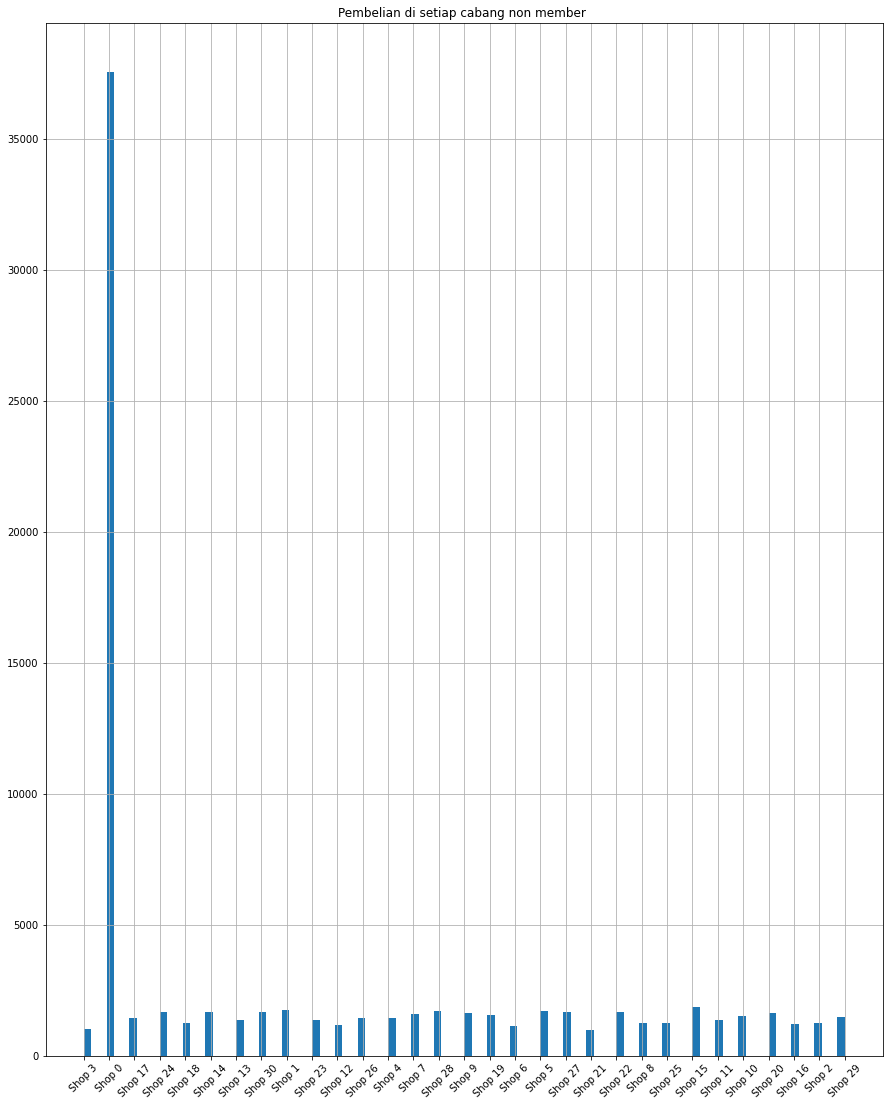

In [188]:
non_member['shop_id'].hist(bins= 100, figsize= (15,19))
plt.title('Pembelian di setiap cabang non member ')
plt.xticks(rotation=45)
plt.show()

### Probabilitas produk yang paling sering di beli dengan program loyalitas dan yang tidak menggunakan program loyalitas

In [189]:
member

,purchase_id,product_id,quantity,purchase_date,customer_id,loyalty_program,shop_id
1,538862,22195,0,2016-12-14 14:11:00,22389.0,1,Shop 2
2,538855,21239,7,2016-12-14 13:50:00,22182.0,1,Shop 3
3,543543,22271,0,2017-02-09 15:33:00,23522.0,1,Shop 28
4,543812,79321,0,2017-02-13 14:40:00,23151.0,1,Shop 28
5,538379,22965,0,2016-12-12 11:26:00,22805.0,1,Shop 20
...,...,...,...,...,...,...,...
105310,543815,21123,1,2017-02-13 15:18:00,22934.0,1,Shop 29
105313,536790,82494L,5,2016-12-02 15:26:00,23529.0,1,Shop 30
105314,538073,22439,0,2016-12-09 14:10:00,23495.0,1,Shop 22
105315,543306,22898,0,2017-02-07 11:56:00,22365.0,1,Shop 18


In [190]:
member['quantity'] = member['quantity'].replace(0,1)

/tmp/ipykernel_73/508661333.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  member['quantity'] = member['quantity'].replace(0,1)


In [191]:
sorted(member['quantity'].unique())

[-241,
 -193,
 -151,
 -145,
 -121,
 -81,
 -77,
 -73,
 -61,
 -49,
 -37,
 -34,
 -33,
 -31,
 -25,
 -24,
 -21,
 -19,
 -17,
 -16,
 -15,
 -14,
 -13,
 -12,
 -11,
 -10,
 -9,
 -8,
 -7,
 -6,
 -5,
 -4,
 -3,
 -2,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 29,
 31,
 33,
 35,
 38,
 39,
 40,
 41,
 45,
 47,
 49,
 51,
 53,
 59,
 63,
 71,
 79,
 89,
 95,
 99,
 107,
 109,
 113,
 119,
 127,
 140,
 143,
 155,
 159,
 167,
 179,
 185,
 191,
 199,
 203,
 207,
 215,
 239,
 249,
 287,
 299,
 319,
 323,
 359,
 377,
 399,
 401,
 407,
 419,
 431,
 455,
 479,
 503,
 575,
 599,
 719,
 799,
 859,
 863,
 971,
 1007,
 1009,
 1055,
 1199,
 1283,
 1295,
 1355,
 1393,
 1399,
 2591,
 2879,
 3905]

In [192]:
member.sample(frac=0.3)

,purchase_id,product_id,quantity,purchase_date,customer_id,loyalty_program,shop_id
80681,544194,22960,11,2017-02-17 08:40:00,22518.0,1,Shop 21
50751,544893,22697,5,2017-02-24 12:01:00,23544.0,1,Shop 1
14595,542789,21123,23,2017-02-01 10:38:00,23190.0,1,Shop 26
16856,538807,85232D,1,2016-12-14 12:06:00,22873.0,1,Shop 28
103733,536409,20723,1,2016-12-01 11:45:00,23587.0,1,Shop 25
...,...,...,...,...,...,...,...
26088,543428,21908,5,2017-02-08 11:36:00,23466.0,1,Shop 8
18655,539308,22326,5,2016-12-16 17:48:00,23091.0,1,Shop 22
33956,540188,22066,1,2017-01-05 13:57:00,22450.0,1,Shop 5
69004,543975,84849B,1,2017-02-14 15:23:00,22910.0,1,Shop 5


#### Kesimpulan awal
- Terdapat banyak keganjilan pada jumlah pembelian dari member loyalitas, dimana terdapat nilai minus

In [193]:
member['quantity'] = member['quantity'].replace (-241, 241).replace (-193, 193).replace (-151, 151).replace (-145, 145).replace (-121, 121).replace (-81, 81).replace (-77, 77).replace (-73, 73).replace (-61, 61).replace (-49, 49).replace (-37, 37).replace (-34, 34).replace (-33, 33).replace (-31, 31).replace (-25, 25).replace (-24, 24).replace (-21, 21).replace (-19, 19).replace (-17, 17).replace (-16, 16).replace (-15, 15).replace (-14, 14).replace (-13, 13).replace (-12, 12).replace (-11, 11).replace (-10, 10).replace (-9, 9).replace (-8, 8).replace (-7, 7).replace (-6, 6).replace (-5, 5).replace (-4, 4).replace (-3, 3).replace (-2, 2)

/tmp/ipykernel_73/3134887233.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  member['quantity'] = member['quantity'].replace (-241, 241).replace (-193, 193).replace (-151, 151).replace (-145, 145).replace (-121, 121).replace (-81, 81).replace (-77, 77).replace (-73, 73).replace (-61, 61).replace (-49, 49).replace (-37, 37).replace (-34, 34).replace (-33, 33).replace (-31, 31).replace (-25, 25).replace (-24, 24).replace (-21, 21).replace (-19, 19).replace (-17, 17).replace (-16, 16).replace (-15, 15).replace (-14, 14).replace (-13, 13).replace (-12, 12).replace (-11, 11).replace (-10, 10).replace (-9, 9).replace (-8, 8).replace (-7, 7).replace (-6, 6).replace (-5, 5).replace (-4, 4).replace (-3, 3).replace (-2, 2)


In [194]:
sorted(member['quantity'].unique())

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 29,
 31,
 33,
 34,
 35,
 37,
 38,
 39,
 40,
 41,
 45,
 47,
 49,
 51,
 53,
 59,
 61,
 63,
 71,
 73,
 77,
 79,
 81,
 89,
 95,
 99,
 107,
 109,
 113,
 119,
 121,
 127,
 140,
 143,
 145,
 151,
 155,
 159,
 167,
 179,
 185,
 191,
 193,
 199,
 203,
 207,
 215,
 239,
 241,
 249,
 287,
 299,
 319,
 323,
 359,
 377,
 399,
 401,
 407,
 419,
 431,
 455,
 479,
 503,
 575,
 599,
 719,
 799,
 859,
 863,
 971,
 1007,
 1009,
 1055,
 1199,
 1283,
 1295,
 1355,
 1393,
 1399,
 2591,
 2879,
 3905]

In [195]:
member

,purchase_id,product_id,quantity,purchase_date,customer_id,loyalty_program,shop_id
1,538862,22195,1,2016-12-14 14:11:00,22389.0,1,Shop 2
2,538855,21239,7,2016-12-14 13:50:00,22182.0,1,Shop 3
3,543543,22271,1,2017-02-09 15:33:00,23522.0,1,Shop 28
4,543812,79321,1,2017-02-13 14:40:00,23151.0,1,Shop 28
5,538379,22965,1,2016-12-12 11:26:00,22805.0,1,Shop 20
...,...,...,...,...,...,...,...
105310,543815,21123,1,2017-02-13 15:18:00,22934.0,1,Shop 29
105313,536790,82494L,5,2016-12-02 15:26:00,23529.0,1,Shop 30
105314,538073,22439,1,2016-12-09 14:10:00,23495.0,1,Shop 22
105315,543306,22898,1,2017-02-07 11:56:00,22365.0,1,Shop 18


In [196]:
most_buy_product = member.pivot_table(index='product_id', values='quantity', aggfunc='count')

In [197]:
most_buy_product

,quantity
product_id,
10002,11
10120,3
10123C,1
10124A,2
10124G,1
...,...
90212B,1
90212C,1
D,4


In [198]:
tab_most_buy_product = most_buy_product.sort_values(by=['quantity'], ascending = False)

In [236]:
tab_most_buy_product.head(10)

,quantity
product_id,
85123A,205
22469,109
21034,106
22470,101
22423,100
22720,94
22960,87
84879,87
85099B,83


#### Kesimpulan Awal 
- Dari dataset yang di sediakan bisa di lihat bahwa product_ID = 85123A mempunyai probabilitas yang paling sering di beli 
- Dari table di atas sudah di perlihatkan top 5 produk dengan probabilitas yang paling sering di beli

In [200]:
sorted(non_member['quantity'].unique())

[-74216,
 -9361,
 -2601,
 -1431,
 -1401,
 -991,
 -940,
 -742,
 -724,
 -601,
 -501,
 -401,
 -391,
 -321,
 -311,
 -301,
 -291,
 -235,
 -231,
 -224,
 -218,
 -208,
 -207,
 -202,
 -201,
 -193,
 -178,
 -174,
 -163,
 -151,
 -146,
 -145,
 -141,
 -131,
 -121,
 -115,
 -107,
 -101,
 -100,
 -97,
 -95,
 -93,
 -89,
 -85,
 -81,
 -78,
 -73,
 -71,
 -70,
 -65,
 -62,
 -61,
 -60,
 -58,
 -55,
 -54,
 -53,
 -51,
 -49,
 -48,
 -46,
 -45,
 -44,
 -43,
 -42,
 -41,
 -39,
 -37,
 -36,
 -34,
 -33,
 -32,
 -31,
 -30,
 -29,
 -26,
 -25,
 -24,
 -23,
 -22,
 -21,
 -20,
 -19,
 -18,
 -17,
 -16,
 -15,
 -14,
 -13,
 -12,
 -11,
 -10,
 -9,
 -8,
 -7,
 -6,
 -5,
 -4,
 -3,
 -2,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 74,
 75,
 77

In [201]:
most_buy_product_non = non_member.pivot_table(index='product_id', values='quantity', aggfunc='count')

In [202]:
most_buy_product_non

,quantity
product_id,
10002,47
10080,1
10120,2
10125,33
10133,34
...,...
gift_0001_20,3
gift_0001_30,3
gift_0001_40,1


In [203]:
tab_most_buy_product_non = most_buy_product_non.sort_values(by=['quantity'], ascending = False)

In [204]:
tab_most_buy_product_non

,quantity
product_id,
22423,399
85123A,360
22469,305
85099B,289
22720,283
...,...
84968f,1
84968e,1
84968d,1


#### Kesimpulan awal
- Dari data yang di jabarkan bisa di lihat top 5 probabilitas penjualan non member yang paling sering di beli

In [205]:
comparasion = pd.merge(tab_most_buy_product, tab_most_buy_product_non, on='product_id')

In [206]:
comparasion.head(10)

,quantity_x,quantity_y
product_id,,
85123A,205,360
22469,109,305
21034,106,100
22470,101,219
22423,100,399
22720,94,283
22960,87,230
84879,87,169
85099B,83,289


#### Kesimpulan awal
- Jika di bandingkan antara member dan non member bisa di lihat bahwa non member memiliki daya beli yang lebih di bandingkan member

#### Kesimpulan awal
- product 22423 merupakan yang terbanyak
- dan produk 85123A di posisi 2 terbanyak di beli, terlihat merupakan product yang paling sering terjual di antara member dan non member

# 2  Hypothesis
Alpha yang di gunakan 5 %

H0 dan H1

H0 merupakan jumlah rata rata penjualan loyalty program non member dan member adalah sama
H1 merupakan jumlah rata rata penjualan loyalty member dan non member adalah tidak sama
pvalue < alpha

Pvalue kurang dari alpha maka menolak H0, yang mempunyai arti penjualan member dan non member tidak sama
Jika pvalue lebih dari nilai alpha maka kita menolak H0 atau tidak bisa menolah H0 yang artinya penjualan member dan non member adalah sama

### Rata Rata penjualalan member 

In [212]:
member_total_sales = member.merge(data2, left_on='product_id',right_on='productID', how= 'left')

In [213]:
member_total_sales

,purchase_id,product_id,quantity,purchase_date,customer_id,loyalty_program,shop_id,productID,price_per_one
0,538862,22195,1,2016-12-14 14:11:00,22389.0,1,Shop 2,22195,1.65
1,538855,21239,7,2016-12-14 13:50:00,22182.0,1,Shop 3,21239,0.72
2,543543,22271,1,2017-02-09 15:33:00,23522.0,1,Shop 28,22271,2.55
3,543812,79321,1,2017-02-13 14:40:00,23151.0,1,Shop 28,79321,0.00
4,538379,22965,1,2016-12-12 11:26:00,22805.0,1,Shop 20,22965,1.85
...,...,...,...,...,...,...,...,...,...
23837,543815,21123,1,2017-02-13 15:18:00,22934.0,1,Shop 29,21123,1.25
23838,536790,82494L,5,2016-12-02 15:26:00,23529.0,1,Shop 30,82494L,2.55
23839,538073,22439,1,2016-12-09 14:10:00,23495.0,1,Shop 22,22439,0.65
23840,543306,22898,1,2017-02-07 11:56:00,22365.0,1,Shop 18,22898,1.65


In [214]:
member_total_sales['total_sales']= member_total_sales['price_per_one'] * member_total_sales['quantity']

In [215]:
member_total_sales

,purchase_id,product_id,quantity,purchase_date,customer_id,loyalty_program,shop_id,productID,price_per_one,total_sales
0,538862,22195,1,2016-12-14 14:11:00,22389.0,1,Shop 2,22195,1.65,1.65
1,538855,21239,7,2016-12-14 13:50:00,22182.0,1,Shop 3,21239,0.72,5.04
2,543543,22271,1,2017-02-09 15:33:00,23522.0,1,Shop 28,22271,2.55,2.55
3,543812,79321,1,2017-02-13 14:40:00,23151.0,1,Shop 28,79321,0.00,0.00
4,538379,22965,1,2016-12-12 11:26:00,22805.0,1,Shop 20,22965,1.85,1.85
...,...,...,...,...,...,...,...,...,...,...
23837,543815,21123,1,2017-02-13 15:18:00,22934.0,1,Shop 29,21123,1.25,1.25
23838,536790,82494L,5,2016-12-02 15:26:00,23529.0,1,Shop 30,82494L,2.55,12.75
23839,538073,22439,1,2016-12-09 14:10:00,23495.0,1,Shop 22,22439,0.65,0.65
23840,543306,22898,1,2017-02-07 11:56:00,22365.0,1,Shop 18,22898,1.65,1.65


In [216]:
member_income = member_total_sales.groupby(['customer_id'])['total_sales'].sum().reset_index()



In [217]:
member_income

,customer_id,total_sales
0,22005.0,260.18
1,22006.0,743.37
2,22011.0,77.54
3,22012.0,2299.97
4,22018.0,69.89
...,...,...
582,23938.0,30.05
583,23939.0,409.84
584,23948.0,77.80
585,23956.0,0.00


In [218]:
sample_A = member_income['total_sales'].mean()

In [219]:
sample_A

499.0634241908007

### Rata rata penjualan non member

In [220]:
non_member_total_sales = non_member.merge(data2, left_on='product_id',right_on='productID', how= 'left')

In [221]:
non_member_total_sales['total_sales']= non_member_total_sales['price_per_one'] * non_member_total_sales['quantity']

In [222]:
non_member_income = non_member_total_sales.groupby(['customer_id'])['total_sales'].sum().reset_index()


In [223]:
sample_B = non_member_income['total_sales'].mean()

In [224]:
sample_B

614.9098968185718

### Membuat hyphothesis rata rata penjualan member dan non member

In [225]:
alpha = 0.05 #signifikansi 

results = stats.mannwhitneyu(sample_A, sample_B)
print('p_value:',results.pvalue)

p_value: 1.0


In [226]:
if (results.pvalue < alpha):
    print('Jumlah rata rata penjualan loyalty program non member dan member adalah sama')
else:
    print('Jumlah rata rata penjualan loyalty member dan non member adalah tidak sama')

Jumlah rata rata penjualan loyalty member dan non member adalah tidak sama


## A/B Testing analysis

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

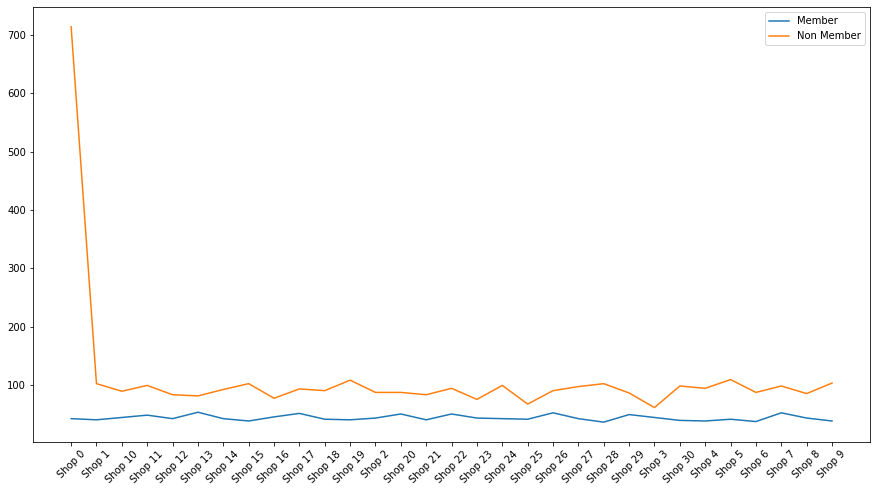

In [239]:
plt.figure(figsize =(15,8))
plt.plot(purch_product_branch_loyal['shop_id'], purch_product_branch_loyal['purchase_date'], label='Member')
plt.plot(purch_product_branch_non['shop_id'], purch_product_branch_non['purchase_date'], label='Non Member')
plt.legend()
plt.xticks(rotation=45)

In [232]:
purch_product_branch_non

,shop_id,purchase_date
0,Shop 0,714
1,Shop 1,102
2,Shop 10,89
3,Shop 11,99
4,Shop 12,83
5,Shop 13,81
6,Shop 14,92
7,Shop 15,102
8,Shop 16,77
9,Shop 17,93


# Kesimpulan
- Ada keganjilan di shop 0 yang merupakan cabang dengan pembelian terbanyak. Kemungkinan besar shop 0 merupakan pembelian secara online
- Dari 1750 cabang 587 cabang mempunyai customer termasuk kedalam program loyalty
- Non member lebih banyak melakukan pembelian di berbagai cabang Home World
- Shop 13, Shop 2, Shop 24 merupakan cabang dimana pembelian product dengan member loyalitas paling banyak
- Pembelian rata rata member di setiap cabang: 43 Pembelian
- Pembelian rata rata non member di setiap cabang: 110 Pembelian
- Probabilitas customer memperpanjang member adalah 33 %
- Probabilitas customer yang tetap melakukan pembelian di Homeworld walaupun bukan member adalah 200 %. Kemungkinan besar adalah pembelian secara online 
- Data dilihat dari distribusi pembelian antara member dan non member pada 
- Perbedaan pembelian retail dan online memperlihatkan lebih banyak pembelian secara online



# Saran 
- Marketing online di tingkatkan lagi
- Memfokuskan promo untuk member terhadap barang barang yang sering terjual jual, seperti di chapter 3.10
- Marketing online di perthankan, jika di lihat dari performanya sangat bagus

# Link Presentasi

- https://docs.google.com/presentation/d/1MrOTnp552zneKJg80dwNaFUJu9aSnagi5ts2xSApxUU/edit?usp=sharing

### Membuat table untuk dashboard
- untuk mendownload data set untuk ke tableau dashboard
1. Tentukan table untuk di download
2. Pindahkan notebook .ipynb ke google collab
3. Sesuaikan stringnya jupyter notebook ke google collab
4. data1 = pd.read_csv('/datasets/retail_dataset_us.csv') = data1 = pd.read_csv('/content/retail_dataset_us_1.csv')
5. datasetnya pun harus di download dan di upload lagi ke google collab
6. dwnld untuk mengconvert table yang di buat 
7. lalu commandnya bisa di download 

In [ ]:
join_table_dashboard = pd.concat([member_total_sales, non_member_total_sales])

In [ ]:
join_table_dashboard

In [ ]:
dwnld = join_table_dashboard.to_csv("join_table_dashboard.csv")

In [ ]:
# Command untuk download dari google collab
dwnld